In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/tree.csv');df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [3]:
df.isnull().sum()

Days            0
Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [4]:
x = df.drop(['Wear Jacket?','Days'],axis=1)
y = df['Wear Jacket?']

# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for col in x:
    x[col] = LabelEncoder().fit_transform(x[col])

In [7]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


# DecisionTreeClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(x,y)

DecisionTreeClassifier()

In [11]:
from sklearn import tree

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(133.92000000000002, 135.9, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

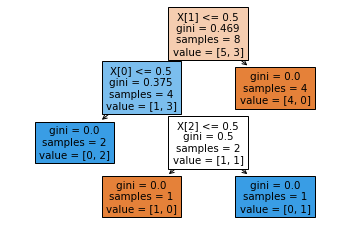

In [12]:
tree.plot_tree(dt,filled=True)

In [13]:
import matplotlib.pyplot as plt

[Text(267.84000000000003, 380.52, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(178.56, 271.8, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(89.28, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 163.07999999999998, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(178.56, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(357.12, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(357.12, 271.8, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

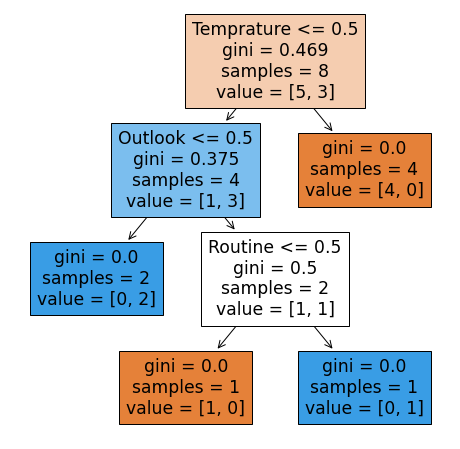

In [15]:
plt.figure(figsize=(8,8))
tree.plot_tree(dt,filled=True,feature_names=x.columns)

# Decision Tree Predict using Function

In [17]:
dt.predict([[1,0,0]])

array(['No'], dtype=object)

In [19]:
def predict_func(o,t,r):
    if o == 'Cloudy' :
        o = 0   
    else:
        o = 1
    if t == 'Cold':
        t = 0
    else:
        t = 1
    if r == 'Indoor':
        r = 0
    else:
        r = 1
    print(dt.predict([[o,t,r]]))

In [23]:
predict_func('Cloudy','Cold','Indoor')

['Yes']
